## Exploration of the Leaky Integrate and Fire (LIF) model.

**CAI Yuwen**


This model represent the neuronal membrane as a resistor capacitor circuit, which 
Reminder: the theory for this model is presented in the first part of the book Neuronal Dynamics:From single neurons to networks and models of cognition, by
Wulfram Gerstner, Werner M. Kistler, Richard Naud and Liam Paninski.

The details of the LIF model are presented [here](https://neuronaldynamics.epfl.ch/online/Ch1.S3.html)


First, let's install the Neuronal Nynamics pyhton module, which uses the Brian2 neuron simulation module.

In [2]:
pip install neurodynex3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 75 kB 2.0 MB/s 
     |████████████████████████████████| 1.6 MB 13.5 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 154 kB 48.4 MB/s 
  Created wheel for brian2: filename=Brian2-2.3-cp38-cp38-linux_x86_64.whl size=1320192 sha256=86b155f1388d4e4cf4ee28d65ecd18817ba2a6e0b23db11560d4fab8b2447f0e
  Stored in directory: /root/.cache/pip/wheels/c1/96/b3/79f461d084226a6b888e5785a300a3bc10d78771e566cf659d
Successfully built brian2


We can then import the modules and functions we need for this practicals

In [3]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

Here is a code to define an imput current, a LIF neuron and to plot the dynamics of the membrane potential response to this current, buit around the function simulate_LIF_neuron.

nr of spikes: 0


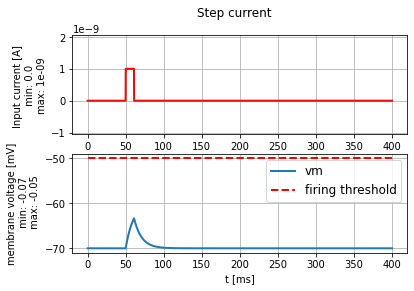

In [21]:
# specify input current
# step current of Amplitude 1 nA during 10 ms
step_current = input_factory.get_step_current(
    t_start=50, t_end=60, unit_time=b2.ms,amplitude=1.0 * b2.namp)
# define and run the LIF model
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-50 * b2.mV,
    membrane_resistance=10. * b2.Mohm, membrane_time_scale=10. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Step current", firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

### Question 1
List and describe the arguments of the function simulate_LIF_neuron in relation to the standard equation (1.5)

step_current: input current

simulation_time: the total time to simulation

v_rest: 𝑢rest which is the potential in the absence of any input

v_reset: Reset voltage after spike

firing_threshold: threshold to go back to urest

membrane_resistance: R

membrane_time_scale: I

abs_refractory_period

𝑢 the membrane potential which is the output

𝜏𝑚 the membrane time constant of the neuron related to the resistance and time scale.



### Question 2
Consider the equation (1.7) and the following paragraph, then build an input current that will induce such a steady state. Explain your reasonning.

We suppose an input with the current never stop which means the duration of input current is long enough, and during this period the capacity is always charged so the membrane potential and this current will induce a steady state.

In order to see what happens after this period we suppose the current ends in 300ms.

nr of spikes: 0


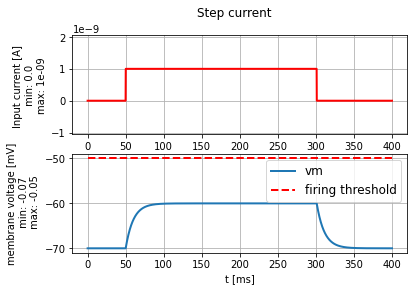

In [23]:
# specify input current
step_current = input_factory.get_step_current(
    t_start=50, t_end=300, unit_time=b2.ms,amplitude=1.0 * b2.namp)

# define and run the LIF model
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-50 * b2.mV,
    membrane_resistance=10. * b2.Mohm, membrane_time_scale=10. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Step current", firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

### Question 3
From the steady state interpretation, explore and explain the effect of the resistor R.

nr of spikes: 0


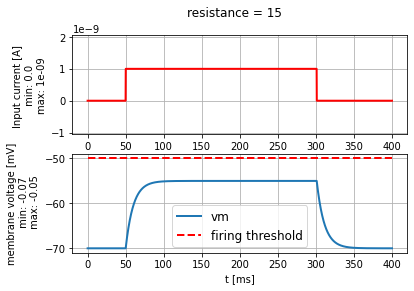

nr of spikes: 0


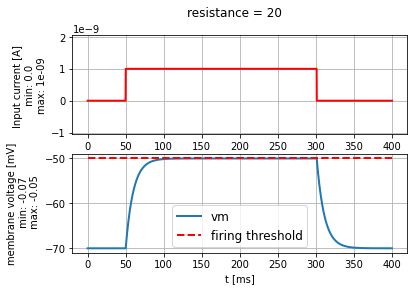

nr of spikes: 15


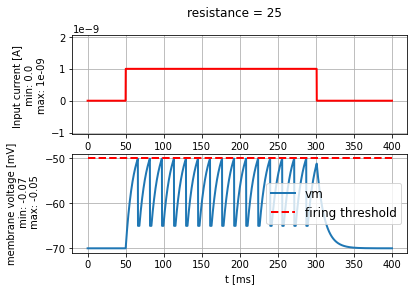

In [24]:
# specify input current
step_current = input_factory.get_step_current(
    t_start=50, t_end=300, unit_time=b2.ms,amplitude=1.0 * b2.namp)

# define and run the LIF model with the resistance equals to 15
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-50 * b2.mV,
    membrane_resistance=15. * b2.Mohm, membrane_time_scale=10. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="resistance = 15", firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

# define and run the LIF model with the resistance equals to 20
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-50 * b2.mV,
    membrane_resistance=20. * b2.Mohm, membrane_time_scale=10. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor,step_current,title="resistance = 20",firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

# define and run the LIF model with the resistance equals to 25
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-50 * b2.mV,
    membrane_resistance=25. * b2.Mohm, membrane_time_scale=10. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor,step_current,title="resistance = 25",firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

Here, I tested the simulation with the resistance of 15Mohm, 20Mohm, 25Mohm with the inital 10Mohm

The bigger the resistance is, the capacity charge more so the output voltage reaches a higher voltage. Even for R=25 it reached the threshold.

### Question 4
From the steady state interpretation, explore and explain the effect of the effect of the Capacitor C.

In order to change the Capacity we change the membrane_time_scale

nr of spikes: 0


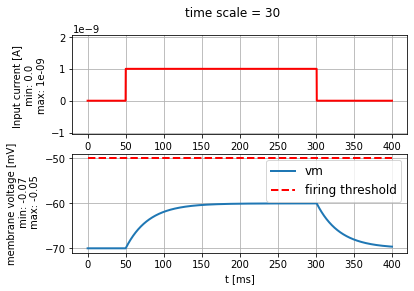

nr of spikes: 0


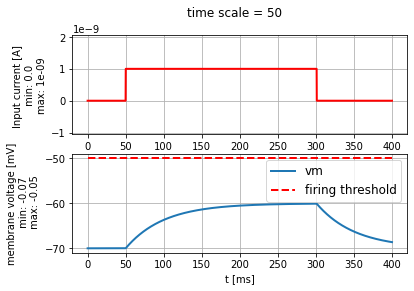

In [25]:
# specify input current
step_current = input_factory.get_step_current(
    t_start=50, t_end=300, unit_time=b2.ms,amplitude=1.0 * b2.namp)

# define and run the LIF model with time scale equals to 30
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-50 * b2.mV,
    membrane_resistance=10. * b2.Mohm, membrane_time_scale=30. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="time scale = 30 ", firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

# define and run the LIF model with time scale equals to 50
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-50 * b2.mV,
    membrane_resistance=10. * b2.Mohm, membrane_time_scale=50. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="time scale = 50", firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

Here, I tested the simulation with the time scale of 30ms and 50ms with the inital 10ms

The longer the time scale is, the capacity charge more slowly so the output voltage takes morr time to reache its highest voltage and to decharge tils the Urest.

### Question 5
From the steady state interpretation, explore and explain the effect of the firing threshold.

In order to have a better view of interval I use the resistance = 20Mohm.

nr of spikes: 19


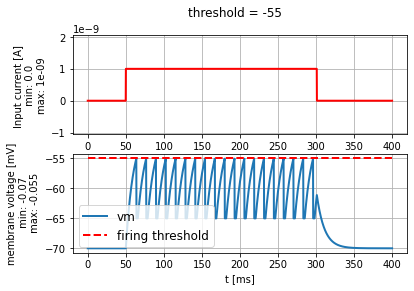

nr of spikes: 41


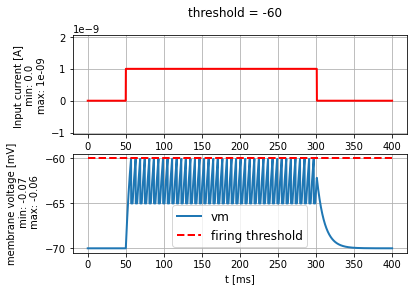

In [26]:
# specify input current
step_current = input_factory.get_step_current(
    t_start=50, t_end=300, unit_time=b2.ms,amplitude=1.0 * b2.namp)

# define and run the LIF model
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-55 * b2.mV,
    membrane_resistance=20. * b2.Mohm, membrane_time_scale=10. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="threshold = -55", firing_threshold=-55 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

# define and run the LIF model
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-60 * b2.mV,
    membrane_resistance=20. * b2.Mohm, membrane_time_scale=10. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="threshold = -60", firing_threshold=-60 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

Here, I tested the simulation with the threshold of -55 and -60 with the inital -50

when the membrane potential arrive to the threshold it will decharge back to the Ureset which is -65

### Question 6
Use the following parameters for the neuron
Resting potential: -0.07 V
Reset voltage: -0.065 V
Firing threshold: -0.05 V
Membrane resistance: 10000000.0 Ohm
Membrane time-scale: 0.008 s
Absolute refractory period: 0.002 s

Build an input current that will generate only one action potential

nr of spikes: 0


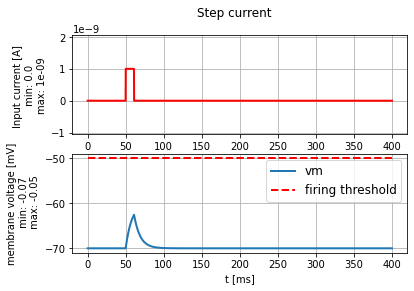

In [27]:
# specify input current
step_current = input_factory.get_step_current(
    t_start=50, t_end=60, unit_time=b2.ms,amplitude=1.0 * b2.namp)

# define and run the LIF model
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-50 * b2.mV,
    membrane_resistance=10. * b2.Mohm, membrane_time_scale=8. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Step current", firing_threshold=-50 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

### Question 7
Use the following step input current
amplitude 1 nA
duration 100 ms

define 3 different set of parameters what will generate exactly 2 action potentials

nr of spikes: 1


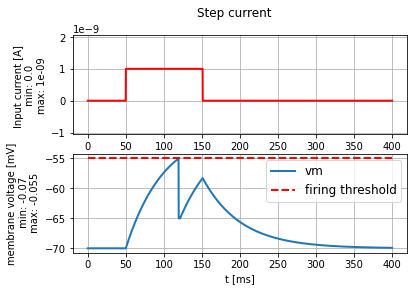

In [28]:
# specify input current
step_current = input_factory.get_step_current(
    t_start=50, t_end=150, unit_time=b2.ms,amplitude=1.0 * b2.namp)

# define and run the LIF model
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current,simulation_time=400 * b2.ms,v_rest=-70 * b2.mV, v_reset=-65 * b2.mV, firing_threshold=-55 * b2.mV,
    membrane_resistance=20. * b2.Mohm, membrane_time_scale=50. * b2.ms, abs_refractory_period= 2.0 * b2.ms)
# plot the membrane voltage dynamics and detect the number of action potentials emitted
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Step current", firing_threshold=-55 * b2.mV)
print("nr of spikes: {}".format(len(spike_monitor.t)))
plt.show()

To generate 2 actions potential, the resistance can be define as 20Mohm, the time scale as 50ms and the threshold as -55mV. Now we can get exactly 2 actions